# Testing the trained Log - Log 14th Degree Poly model

# Test on psm 2017 Data

In [1]:
#IMPORTS
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import pylab as py
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
print(os.listdir())

['.statistical_irradience_modeling.ipynb.icloud', 'data_munger.py', 'Testing_Data', 'Untitled1.ipynb', '.DS_Store', 'Untitled.ipynb', '.Data_Viz 2.ipynb.icloud', 'Raw_Data', 'testing.ipynb', 'Models', 'README.html', 'README.md', 'scratch', 'Model_Testing_psm.ipynb', '.ipynb_checkpoints', '.Model_Testing_psm.ipynb.icloud', '.git']


In [2]:
#Time for Polynomial Fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error
#Okay none of these are super good. Lets do a boxcox transformation
from sklearn.preprocessing import power_transform

In [3]:
_Curr_Dir = os.getcwd()
_Testing_Data_Dir = os.path.join(_Curr_Dir, 'Testing_Data')
print(_Curr_Dir)
print(_Testing_Data_Dir)
# data_path = os.path.join(curr_dir, 'Data_Files', 'Testing_Data')
# print(os.listdir(data_path))

/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor
/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data


In [4]:
def logify_df(df):
    df['DHI_log'] = np.log(df['DHI'])
    df['GHI_log'] = np.log(df['GHI'])
    df['cloud_cover_log'] = np.log(df['Cloud Cover']+0.0000001)
    return df

In [5]:
def make_df_nonzero(df):
    df_no_zero = df.loc[df['DHI']!= 0 ]
    assert len(df_no_zero['DHI'])==len(df_no_zero['GHI']), "Some DHI 0s where GHI is not 0"
    return df_no_zero 

In [6]:
def meta_visualization(data, x='GHI', y='DHI', z='Cloud Cover'):
    sns.lmplot(x, y, data=data, hue=z, fit_reg=False)
    plt.show()
    return

In [7]:
def featureHistograms(df, features=['GHI','DHI','Cloud Cover'],):
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(ncols=len(features))
    for i in range(len(features)):
        sns.distplot(df[features[i]], ax=axs[i])

In [8]:
def runPolyModel(X, Y, model, degrees=14):
    poly = PolynomialFeatures(degree=degrees)
    _X_poly = poly.fit_transform(X)
    result = show_model_metrics(_X_poly, Y, model)
    return result[0], result[1]
    

In [9]:
def show_model_metrics(X, Y, model):
    preds = model.predict(X)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("****MODEL METRICS*****")
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    try:
        print("mean squared log error is ", mean_squared_log_error(Y, preds))
    except:
        print("median absolute error is ", median_absolute_error(Y, preds))
        print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [10]:
def show_model_metrics_logBackTrans(X, Y, model):
    preds = model.predict(X)
    preds = np.exp(preds)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("******LOG BACK TRANSFORMED METRICS")
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    print("mean squared log error is ", mean_squared_log_error(Y, preds))
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [11]:
def three_dee_viz(x,y,z,preds=[]):
    #3d viz
    fig = pyplot.figure()
    ax = Axes3D(fig)
    ax.set(xlabel='arg1', ylabel='arg2', zlabel='arg3')
    ax.scatter(x,y,z)
    if any(preds):
        ax.scatter(x, preds,z)
    plt.show()

In [12]:
def initPolyModel(X, degrees=5):
    poly = PolynomialFeatures(degree=degrees)
    _X_poly = poly.fit_transform(X)
    return _X_poly

In [13]:
def show_model_metrics(X, Y, model):
    preds = model.predict(X)
    resids = Y - preds
    rmse = np.sqrt(mean_squared_error(Y,preds))
    r2 = r2_score(Y,preds)
    print("rmse is ", rmse)
    print("r2 is ",r2)
    print("mean absolute error is ",mean_absolute_error(Y,preds))
    try:
        print("mean squared log error is ", mean_squared_log_error(Y, preds))
    except:
        pass
    print("median absolute error is ", median_absolute_error(Y, preds))
    print("MAPE is ", np.mean(np.abs((Y - preds) / Y)) * 100)
    return preds, resids

In [14]:
#Load the model

In [15]:
from joblib import dump, load
clf_log_log_poly = load("Models/Log_Log_Polynomial_clf.joblib")

print(clf_log_log_poly)
print(type(clf_log_log_poly))
print(clf_log_log_poly.intercept_)
print(clf_log_log_poly.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.03813301661493895
[ 0.00000000e+00  1.13173390e+00  6.48804596e-02 -2.24856838e-01
 -1.08815393e-01  1.09121819e-01  1.00055290e-01  7.04064560e-02
  2.47889391e-02  7.29533807e-02 -1.66462843e-02 -6.93044561e-03
 -7.86819765e-04 -1.43880878e-03  1.09759801e-02  8.09468249e-04
 -1.34202901e-04 -5.04237074e-04 -3.27036609e-04 -2.10783445e-04
  4.25245749e-04]


In [16]:
#Load data
#2017 psm data
# Lat/lon: 43.85, -99.5

df1_psm_2017= pd.read_csv(os.path.join(_Testing_Data_Dir, 'psm_south_dakota', 'psm_testing_data2017.csv'))
#Remove Zeros
df1_psm_2017 = make_df_nonzero(df1_psm_2017)
df1_psm_2017['Cloud Cover'] = df1_psm_2017['Cloud Cover'].apply(lambda x: x+0.00001)
#Logify
df1_psm_2017 = logify_df(df1_psm_2017)
print(df1_psm_2017['cloud_cover_log'])

14     -11.502975
15     -11.502975
16     -11.502975
17     -11.502975
18     -11.502975
          ...    
8754    -1.660678
8755   -11.502975
8756   -11.502975
8757   -11.502975
8758   -11.502975
Name: cloud_cover_log, Length: 4346, dtype: float64


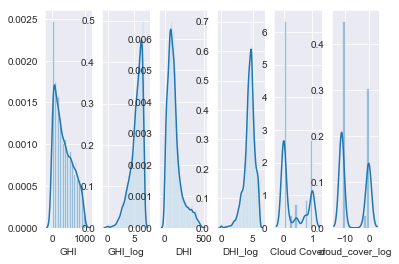

In [17]:
featureHistograms(df1_psm_2017, ['GHI', 'GHI_log', 'DHI', 'DHI_log', 'Cloud Cover', 'cloud_cover_log'])

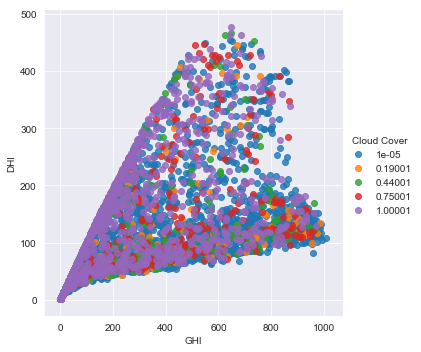

In [18]:
#Check the data out
meta_visualization(df1_psm_2017)

In [19]:
#And now with logs
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['cloud_cover_log'])

In [20]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['cloud_cover_log'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_log_log_poly)

rmse is  13.055459551334755
r2 is  -227.12348246050587
mean absolute error is  10.052059264020427
median absolute error is  16.182487897578078
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


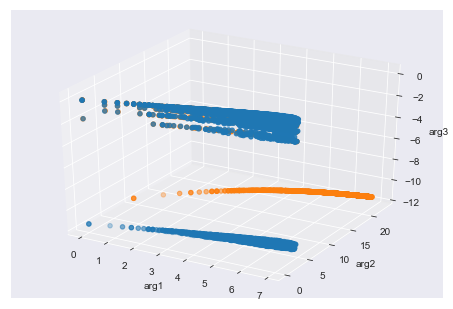

In [21]:
three_dee_viz(df1_psm_2017['GHI_log'],df1_psm_2017['DHI_log'], df1_psm_2017['cloud_cover_log'], preds)

In [22]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(df1_psm_2017['cloud_cover_log'],df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'])
ax.scatter(df1_psm_2017['cloud_cover_log'],df1_psm_2017['GHI_log'], preds)
plt.show()

In [23]:
#Something is OFF

In [24]:
Y_actual = df1_psm_2017['DHI']
preds = np.exp(preds)
rmse = np.sqrt(mean_squared_error(Y_actual,preds))
r2 = r2_score(Y_actual,preds)
print("rmse is ", rmse)
print("r2 is ",r2)
print("mean absolute error is ",mean_absolute_error(Y_actual,preds))
# print("mean squared log error is ", mean_squared_log_error(Y, preds))
print("median absolute error is ", median_absolute_error(Y_actual, preds))
print("MAPE is ", np.mean(np.abs((Y_actual - preds) / Y_actual)) * 100)


rmse is  3924022822.7051477
r2 is  -1860870744205936.5
mean absolute error is  2481981170.5250463
median absolute error is  530173166.0934728
MAPE is  2270839343.88784


In [25]:
#Yup, way OFF

In [26]:
#THEORY: Log transform of Cloud Cover causes huge loss in cloud cover data explanability

In [27]:
#Lets use normal cloud cover values

In [28]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['Cloud Cover'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_log_log_poly)

rmse is  0.5586803292205768
r2 is  0.5822538785161409
mean absolute error is  0.45433801622246855
mean squared log error is  0.010039376996711029
median absolute error is  0.39994081663819303
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


In [29]:
three_dee_viz(df1_psm_2017['GHI_log'],df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'], preds)

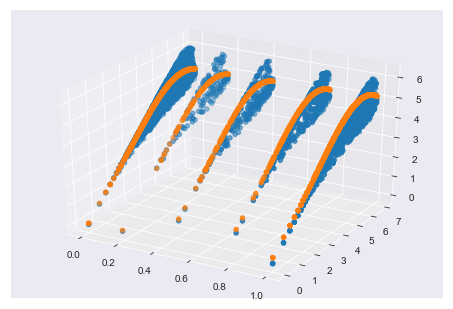

In [30]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(df1_psm_2017['Cloud Cover'],df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'])
ax.scatter(df1_psm_2017['Cloud Cover'],df1_psm_2017['GHI_log'], preds)
plt.show()

In [31]:
#Lets try with a different model, lets make sure cloud cover is NOT log transformed

In [32]:
show_model_metrics_logBackTrans(X, df1_psm_2017['DHI'], clf_log_log_poly )

******LOG BACK TRANSFORMED METRICS
rmse is  78.16198025048439
r2 is  0.26168062309134454
mean absolute error is  58.35218280945155
mean squared log error is  0.30529216908665074
median absolute error is  46.289080090313576
MAPE is  61.784339536341605


(array([ 21.15207879, 113.2514475 , 147.90671757, ..., 154.98298108,
        135.80907364,  67.73795741]),
 14      -7.152079
 15     -66.251448
 16     -81.906718
 17       9.403536
 18      37.998910
           ...    
 8754   -95.645346
 8755   -89.137343
 8756   -92.982981
 8757   -86.809074
 8758   -40.737957
 Name: DHI, Length: 4346, dtype: float64)

## Polynomial fit in log-log except Cloud Data

In [33]:
clf_poly_2 = load("Models/Log_Polynomial_clf.joblib")

print(clf_poly_2)
print(type(clf_poly_2))
print(clf_poly_2.intercept_)
print(clf_poly_2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.06544720351050781
[ 0.00000000e+00  1.06027039e+00 -1.35714898e+00 -1.43103090e-01
  1.64447112e-01  1.20982874e+01  6.62570523e-02 -2.72246070e-01
  1.62293207e+00 -3.86047516e+01 -1.28981345e-02  5.95068820e-02
  9.47386146e-02 -3.09561442e+00  4.84206590e+01  7.55433813e-04
 -4.16384739e-03 -1.28236684e-02  2.98119585e-02  1.48411244e+00
 -2.06266485e+01]


In [34]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['Cloud Cover'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_poly_2)

rmse is  0.45941989959298574
r2 is  0.7175085741097325
mean absolute error is  0.3662556299390973
median absolute error is  0.3117229143788647
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


In [35]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'],preds)

In [36]:
preds, resids = show_model_metrics_logBackTrans(X,df1_psm_2017['DHI'],clf_poly_2)

******LOG BACK TRANSFORMED METRICS
rmse is  76.21470653615158
r2 is  0.2980103285014444
mean absolute error is  48.295473045458785
mean squared log error is  0.20721238204952475
median absolute error is  30.124736463863158
MAPE is  36.93472144314497


In [37]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI'], df1_psm_2017['Cloud Cover'],preds)

## Polynomial fit in log data 

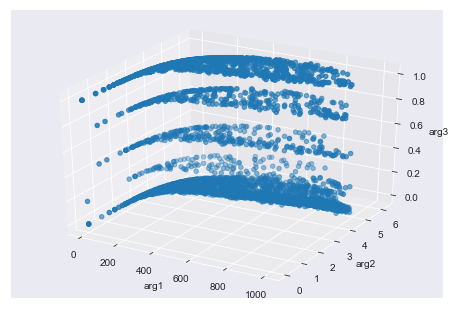

In [38]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'])

In [39]:
#Load model

In [40]:
clf_poly = load("Models/Polynomial_clf.joblib")

print(clf_poly)
print(type(clf_poly))
print(clf_poly.intercept_)
print(clf_poly.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
1.7789789044331203
[ 0.00000000e+00  4.10931067e-02  8.25022070e-02 -2.10323379e-04
  1.25931767e-04  3.23971458e-02  4.78464016e-07 -7.89474301e-06
  1.09172396e-02 -2.14491774e-04 -4.89035238e-10  1.21042036e-08
  1.45345267e-06 -1.90833226e-02 -2.21119292e-02  1.83560675e-13
 -7.60606215e-12  2.43441387e-09 -4.04026927e-06  1.11572334e-02
 -3.74068568e-02]


In [41]:
#Lets make some predictions
_X = list(zip(df1_psm_2017['GHI'].values, df1_psm_2017['Cloud Cover'].values))
X = initPolyModel(_X, degrees=5)
Y = df1_psm_2017['DHI_log'].values
preds, resids = show_model_metrics(X, Y, clf_poly)

rmse is  0.4886969939368489
r2 is  0.6803571451494024
mean absolute error is  0.3942171508027232
mean squared log error is  0.009854842073433994
median absolute error is  0.35343005208508393
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


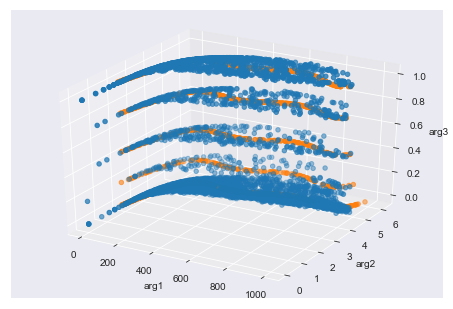

In [42]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'],preds)

In [43]:
preds_backtrans, resids = show_model_metrics_logBackTrans(X, df1_psm_2017['DHI'], clf_poly)

******LOG BACK TRANSFORMED METRICS
rmse is  76.29705114901704
r2 is  0.2964926084310744
mean absolute error is  49.021369499992026
mean squared log error is  0.22945558163653243
median absolute error is  29.77718066445332
MAPE is  40.79627272587239


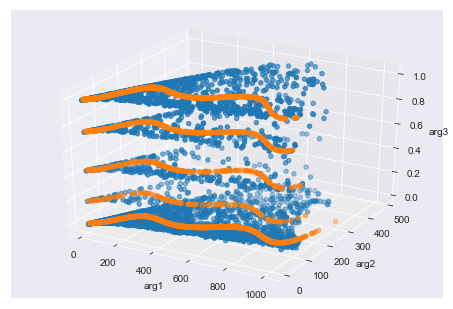

In [44]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI'], df1_psm_2017['Cloud Cover'],preds_backtrans)

## OLS in Log-Log model

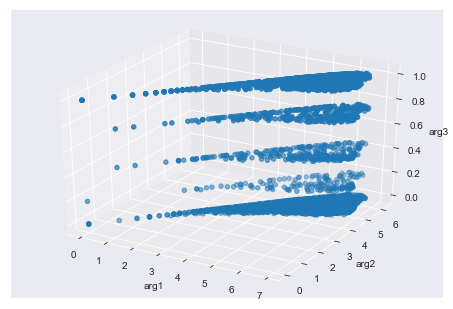

In [45]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'])

In [46]:
clf_OLS_log_log = load("Models/OLS_log_log_clf.joblib")

print(clf_OLS_log_log)
print(type(clf_OLS_log_log))
print(clf_OLS_log_log.intercept_)
print(clf_OLS_log_log.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.9351297431441159
[0.62767233 0.3428279 ]


In [47]:
X = list(zip(df1_psm_2017['GHI_log'], df1_psm_2017['Cloud Cover']))
Y = df1_psm_2017['DHI_log']
preds, resids = show_model_metrics(X, Y, clf_OLS_log_log)

rmse is  0.49730498019801517
r2 is  0.6689974934583722
mean absolute error is  0.4213511833877614
mean squared log error is  0.008923738931120785
median absolute error is  0.3986784269640826
MAPE is  inf


In [48]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'], preds)

In [49]:
preds, resids = show_model_metrics_logBackTrans(X, df1_psm_2017['DHI'], clf_OLS_log_log)

******LOG BACK TRANSFORMED METRICS
rmse is  77.49802345225432
r2 is  0.27417084105797596
mean absolute error is  54.044979015005886
mean squared log error is  0.24023805977893728
median absolute error is  39.23905483806014
MAPE is  41.47842026451529


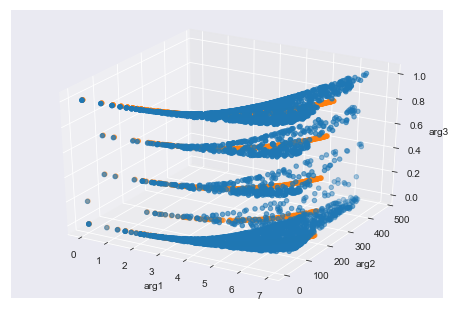

In [50]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI'], df1_psm_2017['Cloud Cover'], preds)

## WLS Log - Log Model

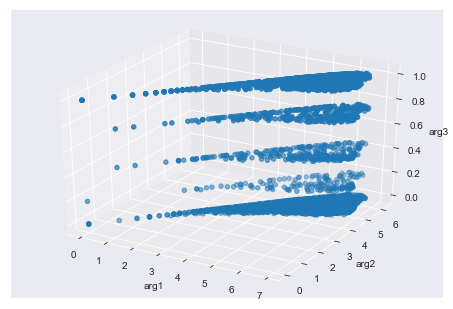

In [51]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'])

In [52]:
clf_wls_log_log = load("Models/Log_WLS_clf.joblib")

print(clf_wls_log_log)
print(type(clf_wls_log_log))
print(clf_wls_log_log.intercept_)
print(clf_wls_log_log.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.6138223794565834
[0.69190748 0.32936905]


In [53]:
X = list(zip(df1_psm_2017['GHI_log'].values, df1_psm_2017['Cloud Cover'].values))
Y = df1_psm_2017['DHI_log']
preds, resids = show_model_metrics(X, Y, clf_wls_log_log)

rmse is  0.5067316359563497
r2 is  0.6563299365258664
mean absolute error is  0.4373058228594766
mean squared log error is  0.008598559395577923
median absolute error is  0.43693140954550813
MAPE is  inf


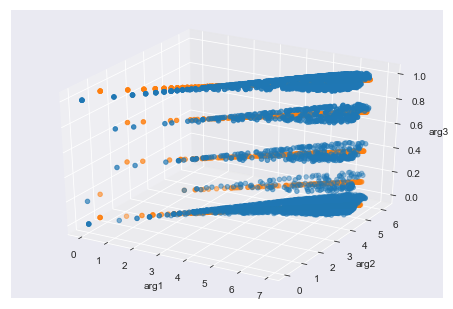

In [54]:
three_dee_viz(df1_psm_2017['GHI_log'], df1_psm_2017['DHI_log'], df1_psm_2017['Cloud Cover'], preds)

In [55]:
preds, resids = show_model_metrics_logBackTrans(X, df1_psm_2017['DHI'], clf_wls_log_log)

******LOG BACK TRANSFORMED METRICS
rmse is  78.22727224933875
r2 is  0.2604466092612302
mean absolute error is  57.053862437818715
mean squared log error is  0.2507404083931255
median absolute error is  45.396499325026326
MAPE is  44.71283474652505


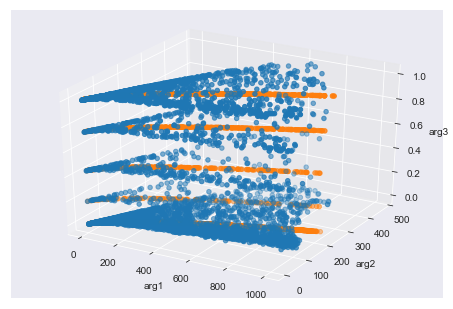

In [56]:
three_dee_viz(df1_psm_2017['GHI'], df1_psm_2017['DHI'], df1_psm_2017['Cloud Cover'], preds)

## OLS on Log-Log-Logit

In [57]:
from scipy.special import logit

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

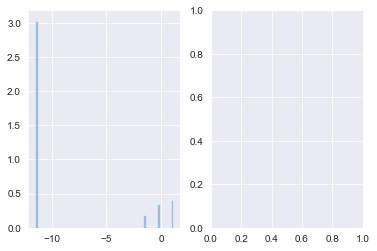

In [58]:
logit_vals = (df1_psm_2017['Cloud Cover'].values)
for i in range(len(logit_vals)):
    if logit_vals[i] ==0:
        logit_vals[i]+=0.00001
    elif logit_vals[i]==1:
        logit_vals[i]-=0.00001
logit_vals = logit(logit_vals)


sns.set_style('darkgrid')
fig, axs = plt.subplots(ncols=2)
sns.distplot(logit_vals, ax=axs[0])
sns.distplot(df1_psm_2017['Cloud Cover'], ax=axs[1])


In [59]:
#Cannot estimate density error

# PSM Testing_South Dakota - More years

In [60]:
print(_Testing_Data_Dir)
_test_files = []
for i in (os.listdir(os.path.join(_Testing_Data_Dir, 'psm_south_dakota'))):
    if i.startswith('psm'):
        _test_files.append(i)
print(_test_files)

/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data
['psm_testing_data2018_copy.csv', 'psm_testing_data2009.csv', 'psm_testing_data2008.csv', 'psm_testing_data2018.csv', 'psm_testing_data2017.csv', 'psm_testing_data2016.csv', 'psm_testing_data2014.csv', 'psm_testing_data2015.csv', 'psm_testing_data2011.csv', 'psm_testing_data2010.csv', 'psm_testing_data2012.csv', 'psm_testing_data2007.csv', 'psm_testing_data2013.csv']


In [61]:
#Import model
clf_poly_2 = load("Models/Log_Polynomial_clf.joblib")

print(clf_poly_2)
print(type(clf_poly_2))
print(clf_poly_2.intercept_)
print(clf_poly_2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.06544720351050781
[ 0.00000000e+00  1.06027039e+00 -1.35714898e+00 -1.43103090e-01
  1.64447112e-01  1.20982874e+01  6.62570523e-02 -2.72246070e-01
  1.62293207e+00 -3.86047516e+01 -1.28981345e-02  5.95068820e-02
  9.47386146e-02 -3.09561442e+00  4.84206590e+01  7.55433813e-04
 -4.16384739e-03 -1.28236684e-02  2.98119585e-02  1.48411244e+00
 -2.06266485e+01]


***********  psm_testing_data2018_copy.csv  TESTING*************
rmse is  0.4371695541032832
r2 is  0.813503551412581
mean absolute error is  0.3414708796524964
median absolute error is  0.28003726370704163
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


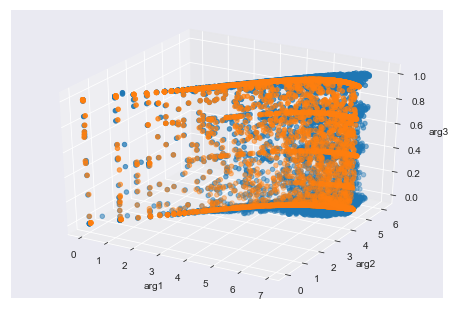

******LOG BACK TRANSFORMED METRICS
rmse is  66.85075078890122
r2 is  0.36421404612429353
mean absolute error is  42.266869674638464
mean squared log error is  0.18731826948023075
median absolute error is  26.97435828431192
MAPE is  35.603912145290714
***********  psm_testing_data2009.csv  TESTING*************
rmse is  0.47491924420527065
r2 is  0.7485682939714846
mean absolute error is  0.37218274982602345
mean squared log error is  0.006607070905850484
median absolute error is  0.2988357918235649
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


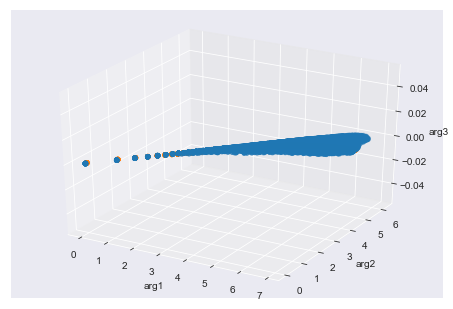

******LOG BACK TRANSFORMED METRICS
rmse is  80.52652290787448
r2 is  0.2285417593106015
mean absolute error is  48.61391189814458
mean squared log error is  0.22175591361633773
median absolute error is  25.7445433113623
MAPE is  32.704192815586296
***********  psm_testing_data2008.csv  TESTING*************
rmse is  0.4807581313523073
r2 is  0.7296272648491865
mean absolute error is  0.3802521477151212
mean squared log error is  0.006804839373757947
median absolute error is  0.32527924937125796
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


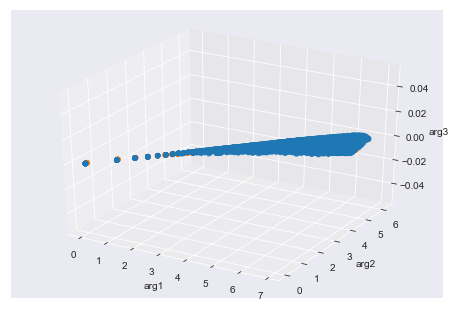

******LOG BACK TRANSFORMED METRICS
rmse is  81.5129427846116
r2 is  0.21186585384705814
mean absolute error is  49.67295672814048
mean squared log error is  0.2271717520060383
median absolute error is  28.339733613093443
MAPE is  34.187487810961265
***********  psm_testing_data2018.csv  TESTING*************
rmse is  0.4371695541032832
r2 is  0.813503551412581
mean absolute error is  0.3414708796524964
median absolute error is  0.28003726370704163
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


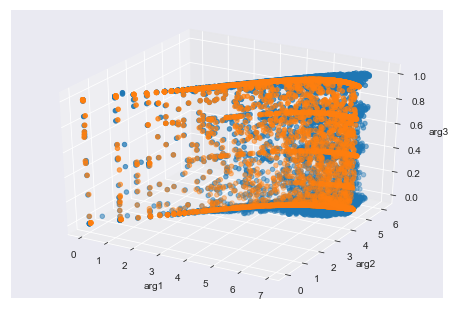

******LOG BACK TRANSFORMED METRICS
rmse is  66.85075078890122
r2 is  0.36421404612429353
mean absolute error is  42.266869674638464
mean squared log error is  0.18731826948023075
median absolute error is  26.97435828431192
MAPE is  35.603912145290714
***********  psm_testing_data2017.csv  TESTING*************
rmse is  0.45941960609503046
r2 is  0.7175089350459021
mean absolute error is  0.36625731998917593
median absolute error is  0.31169944410608563
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


******LOG BACK TRANSFORMED METRICS
rmse is  76.21433872329693
r2 is  0.29801710410194715
mean absolute error is  48.29570002244337
mean squared log error is  0.2072120781439237
median absolute error is  30.127194940497972
MAPE is  36.93542211839049
***********  psm_testing_data2016.csv  TESTING*************
rmse is  0.4844092495735717
r2 is  0.6861964596517955
mean absolute error is  0.39039444676799934
median absolute error is  0.3378769090993381
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


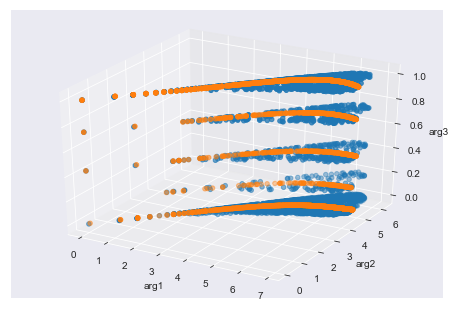

******LOG BACK TRANSFORMED METRICS
rmse is  77.83725902322423
r2 is  0.265823993497007
mean absolute error is  49.32839915080085
mean squared log error is  0.23019400897088946
median absolute error is  31.53797431842699
MAPE is  40.6003693479032
***********  psm_testing_data2014.csv  TESTING*************
rmse is  0.52085602762372
r2 is  0.666212809490406
mean absolute error is  0.42487011260675905
median absolute error is  0.3851312374756475
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


******LOG BACK TRANSFORMED METRICS
rmse is  86.66679319938898
r2 is  0.18984090605591575
mean absolute error is  56.14726668870945
mean squared log error is  0.266491051447321
median absolute error is  34.98417514233378
MAPE is  41.08275877603199
***********  psm_testing_data2015.csv  TESTING*************
rmse is  0.4904087032217132
r2 is  0.7033707463304459
mean absolute error is  0.399009593204467
median absolute error is  0.35676808735964904
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


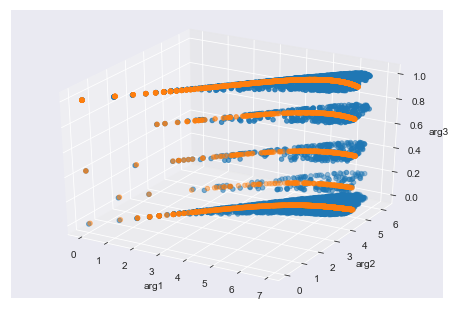

******LOG BACK TRANSFORMED METRICS
rmse is  82.68684939637104
r2 is  0.2737153493300395
mean absolute error is  53.32745183611746
mean squared log error is  0.2361729455519649
median absolute error is  34.38095125872164
MAPE is  40.08755256669394
***********  psm_testing_data2011.csv  TESTING*************
rmse is  0.49892227174013665
r2 is  0.6945959109735471
mean absolute error is  0.4021516378380475
mean squared log error is  0.007367350378847175
median absolute error is  0.34378279383618393
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


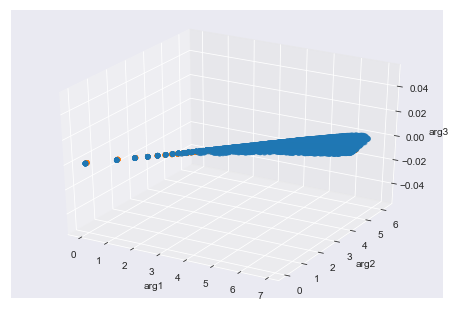

******LOG BACK TRANSFORMED METRICS
rmse is  83.17899007845152
r2 is  0.190306618463285
mean absolute error is  51.8326037122575
mean squared log error is  0.2445985520434216
median absolute error is  29.763724885412103
MAPE is  36.4270046716353
***********  psm_testing_data2010.csv  TESTING*************
rmse is  0.48021105712599793
r2 is  0.7274852569412211
mean absolute error is  0.38432423931601295
mean squared log error is  0.006892390182906432
median absolute error is  0.3255441020944305
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


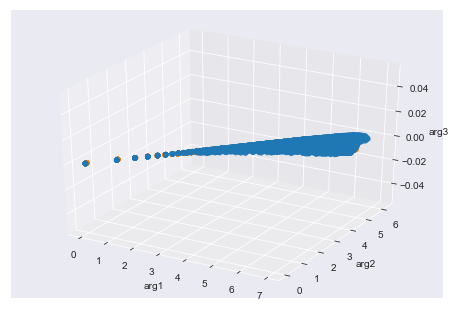

******LOG BACK TRANSFORMED METRICS
rmse is  79.17149267848951
r2 is  0.2256197026365595
mean absolute error is  47.89858240130732
mean squared log error is  0.2264801101019465
median absolute error is  27.45740855354913
MAPE is  35.34153551177261
***********  psm_testing_data2012.csv  TESTING*************
rmse is  0.46462887136073155
r2 is  0.7051261850731991
mean absolute error is  0.3670007945240664
mean squared log error is  0.00642889550563951
median absolute error is  0.30742370198954827
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


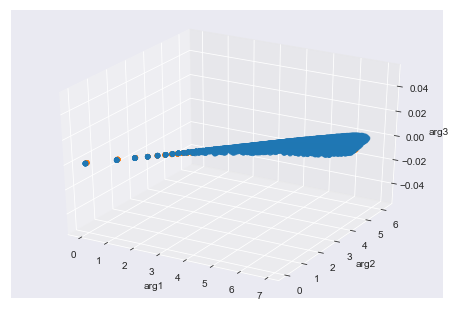

******LOG BACK TRANSFORMED METRICS
rmse is  76.53722157836138
r2 is  0.2226184347687512
mean absolute error is  46.84224693647815
mean squared log error is  0.21206082722559208
median absolute error is  27.1030610553931
MAPE is  34.041212752174715
***********  psm_testing_data2007.csv  TESTING*************
rmse is  0.49249519224213967
r2 is  0.6907107255379783
mean absolute error is  0.3904389768264515
mean squared log error is  0.007119049494927293
median absolute error is  0.3287875961441915
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


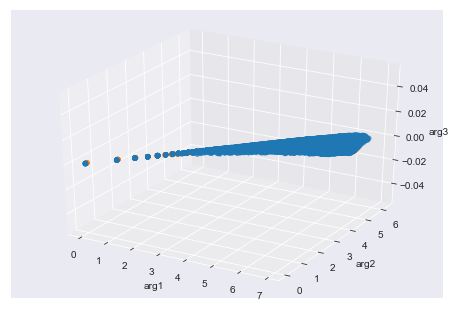

******LOG BACK TRANSFORMED METRICS
rmse is  83.84469556685859
r2 is  0.1931593996902482
mean absolute error is  51.38500354997251
mean squared log error is  0.2384300384836624
median absolute error is  29.20122464367605
MAPE is  35.310434751840276
***********  psm_testing_data2013.csv  TESTING*************
rmse is  0.5221092969751356
r2 is  0.6694442304083112
mean absolute error is  0.422367232334478
mean squared log error is  0.007966164768208661
median absolute error is  0.3686867674412988
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


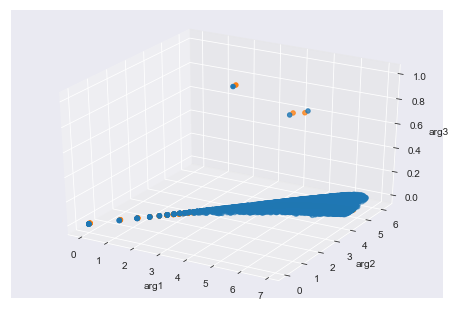

******LOG BACK TRANSFORMED METRICS
rmse is  88.95216212488168
r2 is  0.15732351415110724
mean absolute error is  56.53559305371582
mean squared log error is  0.2680369601964547
median absolute error is  32.15032748641657
MAPE is  37.73076831104588


In [62]:
for idx, i in enumerate(_test_files):
    path = (os.path.join(_Testing_Data_Dir,'psm_south_dakota', i))
    df = pd.read_csv(path)
    df = make_df_nonzero(df)
    df = logify_df(df)
    _X = list(zip(df['GHI_log'].values, df['Cloud Cover'].values))
    X = initPolyModel(_X, degrees=5)
    Y = df['DHI_log'].values
    print("*********** ", i," TESTING*************")
    preds, resids = show_model_metrics(X, Y, clf_poly_2)
    three_dee_viz(df['GHI_log'], df['DHI_log'], df['Cloud Cover'], preds)
    preds, resids = show_model_metrics_logBackTrans(X, df['DHI'], clf_poly_2)
    

In [63]:
#Most MAPEs are 30%-40% for each location. COOL!

# Charlottesville Testing

In [64]:
print(_Testing_Data_Dir)
_test_files = []
for i in (os.listdir(os.path.join(_Testing_Data_Dir, 'Charlottesville'))):
    if i.startswith('psm'):
        _test_files.append(i)
print(_test_files)

/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data
['psm_VA_Charlottesville2018.csv', 'psm_VA_Charlottesville2014.csv', 'psm_VA_Charlottesville2015.csv', 'psm_VA_Charlottesville2017.csv', 'psm_VA_Charlottesville2016.csv', 'psm_VA_Charlottesville2012.csv', 'psm_VA_Charlottesville2013.csv', 'psm_VA_Charlottesville2011.csv', 'psm_VA_Charlottesville2010.csv']


In [65]:
#Import model
clf_poly_2 = load("Models/Log_Polynomial_clf.joblib")

print(clf_poly_2)
print(type(clf_poly_2))
print(clf_poly_2.intercept_)
print(clf_poly_2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.06544720351050781
[ 0.00000000e+00  1.06027039e+00 -1.35714898e+00 -1.43103090e-01
  1.64447112e-01  1.20982874e+01  6.62570523e-02 -2.72246070e-01
  1.62293207e+00 -3.86047516e+01 -1.28981345e-02  5.95068820e-02
  9.47386146e-02 -3.09561442e+00  4.84206590e+01  7.55433813e-04
 -4.16384739e-03 -1.28236684e-02  2.98119585e-02  1.48411244e+00
 -2.06266485e+01]


***********  psm_VA_Charlottesville2018.csv  TESTING*************
rmse is  0.4502664194605773
r2 is  0.8413407302350043
mean absolute error is  0.34164840791878087
median absolute error is  0.26015192793163067
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


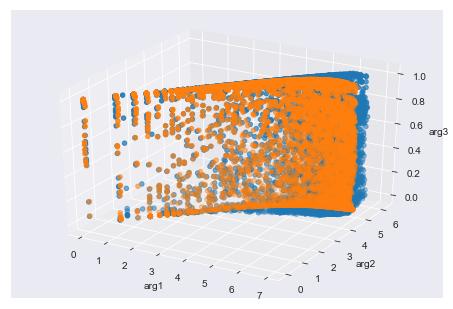

******LOG BACK TRANSFORMED METRICS
rmse is  81.37162886003095
r2 is  0.3488172126404532
mean absolute error is  48.83726463534587
mean squared log error is  0.1992653058351044
median absolute error is  24.833881079720527
MAPE is  31.887864341472515
***********  psm_VA_Charlottesville2014.csv  TESTING*************
rmse is  0.493462885226388
r2 is  0.7119108924301474
mean absolute error is  0.38291991630285643
median absolute error is  0.3074084787127984
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


******LOG BACK TRANSFORMED METRICS
rmse is  94.87134210878506
r2 is  0.20921080166630868
mean absolute error is  58.575532076219744
mean squared log error is  0.2398882641434417
median absolute error is  30.656025629705624
MAPE is  34.445829407469716
***********  psm_VA_Charlottesville2015.csv  TESTING*************
rmse is  0.4960623306321223
r2 is  0.7253784865381241
mean absolute error is  0.38504431669615624
median absolute error is  0.30681582807273866
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


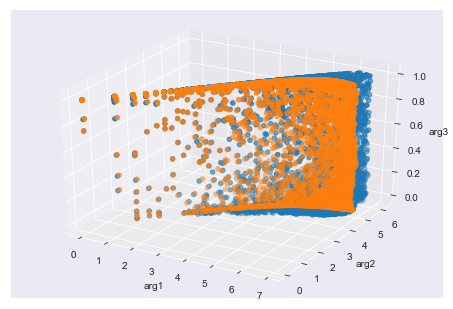

******LOG BACK TRANSFORMED METRICS
rmse is  94.13943692238652
r2 is  0.21395573001616286
mean absolute error is  58.025553070120644
mean squared log error is  0.24234761445478364
median absolute error is  30.491257192754944
MAPE is  34.72585719024529
***********  psm_VA_Charlottesville2017.csv  TESTING*************
rmse is  0.4793869795400393
r2 is  0.7109728151321464
mean absolute error is  0.37307902136189713
median absolute error is  0.3037002238041553
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


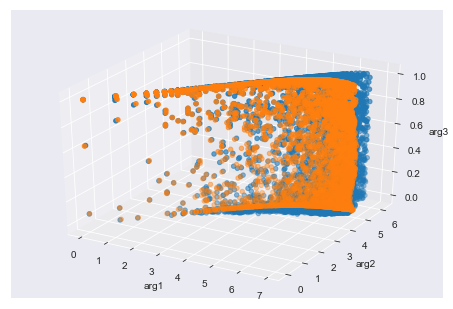

******LOG BACK TRANSFORMED METRICS
rmse is  91.61872090415933
r2 is  0.23295687910957175
mean absolute error is  55.80915858345579
mean squared log error is  0.2262912274360406
median absolute error is  30.50440249380906
MAPE is  34.38628488839106
***********  psm_VA_Charlottesville2016.csv  TESTING*************
rmse is  0.4905702291658383
r2 is  0.6887888041273622
mean absolute error is  0.386036563996302
median absolute error is  0.3155142338927934
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


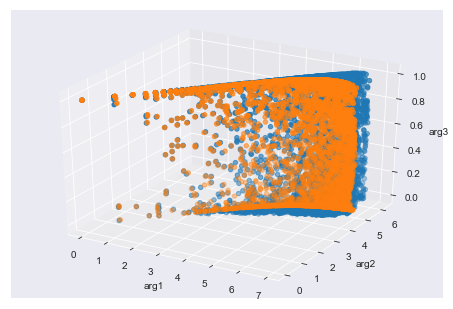

******LOG BACK TRANSFORMED METRICS
rmse is  91.26698799771991
r2 is  0.2295411416382125
mean absolute error is  56.4910781278618
mean squared log error is  0.23680824187740365
median absolute error is  30.09894971084333
MAPE is  36.386018943385736
***********  psm_VA_Charlottesville2012.csv  TESTING*************
rmse is  0.5053042556641276
r2 is  0.6811373005625407
mean absolute error is  0.3965185365695313
median absolute error is  0.3271581266893788
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


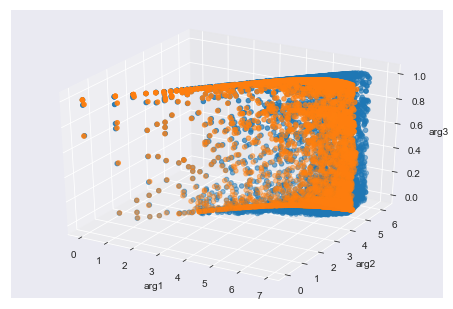

******LOG BACK TRANSFORMED METRICS
rmse is  97.29431368709203
r2 is  0.18026835119633322
mean absolute error is  61.16779419456732
mean squared log error is  0.2516269446931785
median absolute error is  32.96587224787402
MAPE is  35.20828770043781
***********  psm_VA_Charlottesville2013.csv  TESTING*************
rmse is  0.49747544704514174
r2 is  0.7134483816971625
mean absolute error is  0.3910049494167709
median absolute error is  0.3222769980467177
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


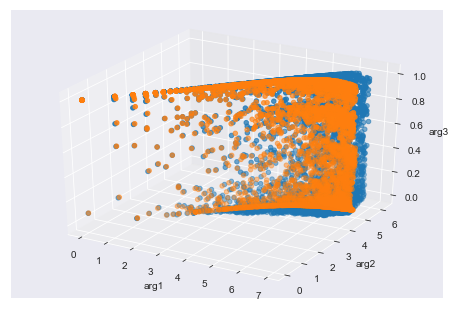

******LOG BACK TRANSFORMED METRICS
rmse is  94.15305733379896
r2 is  0.2167629440574752
mean absolute error is  58.7625970854528
mean squared log error is  0.24371985722492207
median absolute error is  32.31658740194132
MAPE is  35.621842797354994
***********  psm_VA_Charlottesville2011.csv  TESTING*************
rmse is  0.4941643288350613
r2 is  0.7187409601318229
mean absolute error is  0.38589214661156024
median absolute error is  0.31731979886842243
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


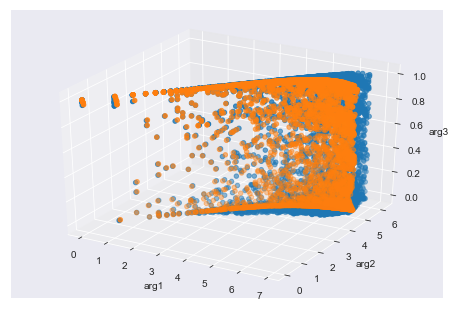

******LOG BACK TRANSFORMED METRICS
rmse is  95.77500339614278
r2 is  0.20345876910657357
mean absolute error is  59.6427289694416
mean squared log error is  0.24061735838251985
median absolute error is  32.38756501208483
MAPE is  34.2627221483301
***********  psm_VA_Charlottesville2010.csv  TESTING*************
rmse is  0.4816046358477817
r2 is  0.7121752290428871
mean absolute error is  0.37101492790135304
median absolute error is  0.295216718334399
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


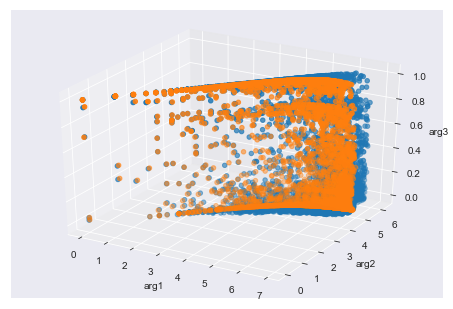

******LOG BACK TRANSFORMED METRICS
rmse is  90.70541733452096
r2 is  0.20701525757030104
mean absolute error is  54.857260700461794
mean squared log error is  0.22843445722510577
median absolute error is  28.549965210215248
MAPE is  33.31862689098768


In [66]:
#Test this model
for idx, i in enumerate(_test_files):
    path = (os.path.join(_Testing_Data_Dir, 'Charlottesville', i))
    df = pd.read_csv(path)
    df = make_df_nonzero(df)
    df = logify_df(df)
    _X = list(zip(df['GHI_log'].values, df['Cloud Cover'].values))
    X = initPolyModel(_X, degrees=5)
    Y = df['DHI_log'].values
    print("*********** ", i," TESTING*************")
    preds, resids = show_model_metrics(X, Y, clf_poly_2)
    three_dee_viz(df['GHI_log'], df['DHI_log'], df['Cloud Cover'], preds)
    preds, resids = show_model_metrics_logBackTrans(X, df['DHI'], clf_poly_2)
    

In [67]:
#Most MAPEs are 30%-40% for each location. COOL!

# Austin_TX Testing

In [68]:
print(_Testing_Data_Dir)
_test_files = []
for i in (os.listdir(os.path.join(_Testing_Data_Dir, 'Austin_TX'))):
    if i.startswith('psm'):
        _test_files.append(i)
print(_test_files)

/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data
['psm_TX_Austin2018.csv', 'psm_TX_Austin2010.csv', 'psm_TX_Austin2011.csv', 'psm_TX_Austin2013.csv', 'psm_TX_Austin2012.csv', 'psm_TX_Austin2016.csv', 'psm_TX_Austin2017.csv', 'psm_TX_Austin2015.csv', 'psm_TX_Austin2014.csv']


In [69]:
#Import model
clf_poly_2 = load("Models/Log_Polynomial_clf.joblib")

print(clf_poly_2)
print(type(clf_poly_2))
print(clf_poly_2.intercept_)
print(clf_poly_2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.06544720351050781
[ 0.00000000e+00  1.06027039e+00 -1.35714898e+00 -1.43103090e-01
  1.64447112e-01  1.20982874e+01  6.62570523e-02 -2.72246070e-01
  1.62293207e+00 -3.86047516e+01 -1.28981345e-02  5.95068820e-02
  9.47386146e-02 -3.09561442e+00  4.84206590e+01  7.55433813e-04
 -4.16384739e-03 -1.28236684e-02  2.98119585e-02  1.48411244e+00
 -2.06266485e+01]


***********  psm_TX_Austin2018.csv  TESTING*************
rmse is  0.4602510771450354
r2 is  0.8281387134226275
mean absolute error is  0.3581105347763844
median absolute error is  0.2904254072921697
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


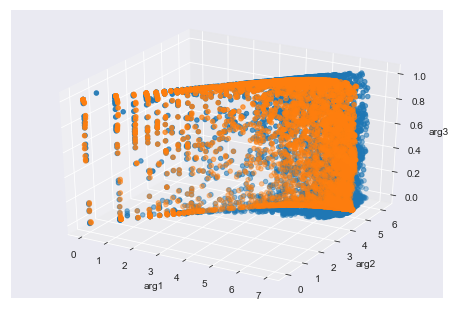

******LOG BACK TRANSFORMED METRICS
rmse is  79.43577728790572
r2 is  0.32743604967143336
mean absolute error is  49.09572745126784
mean squared log error is  0.20802488163974184
median absolute error is  28.968807233019106
MAPE is  35.58820353456946
***********  psm_TX_Austin2010.csv  TESTING*************
rmse is  0.49024875312881244
r2 is  0.6733704369127227
mean absolute error is  0.37606322861498204
median absolute error is  0.2959127526059717
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


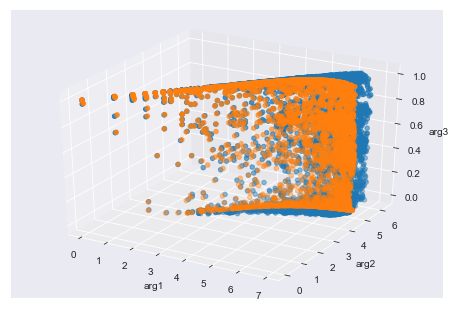

******LOG BACK TRANSFORMED METRICS
rmse is  99.8718135680706
r2 is  0.19400344581385054
mean absolute error is  58.86708862438299
mean squared log error is  0.23692615101992404
median absolute error is  30.1965890252133
MAPE is  34.625929567399204
***********  psm_TX_Austin2011.csv  TESTING*************
rmse is  0.4336580216640204
r2 is  0.6782888588011977
mean absolute error is  0.33063419952785295
median absolute error is  0.25737809213964
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


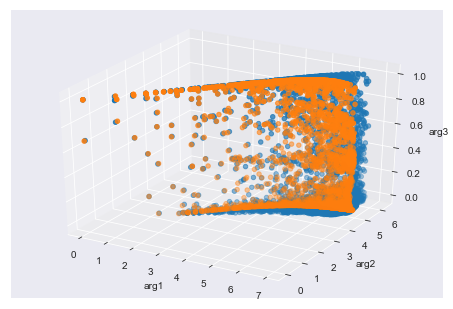

******LOG BACK TRANSFORMED METRICS
rmse is  80.93620336076484
r2 is  0.21531178581311794
mean absolute error is  48.28387834209991
mean squared log error is  0.1852169044372569
median absolute error is  27.03236230716358
MAPE is  30.62123452974952
***********  psm_TX_Austin2013.csv  TESTING*************
rmse is  0.495167372999466
r2 is  0.6497602006684005
mean absolute error is  0.38108834068942965
median absolute error is  0.3019172111582975
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


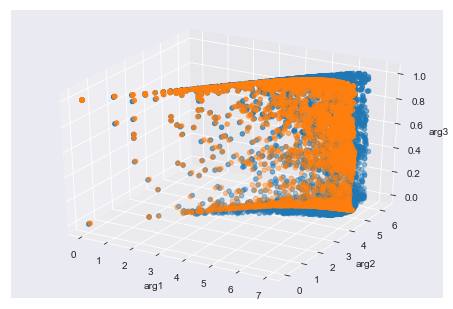

******LOG BACK TRANSFORMED METRICS
rmse is  98.94671262169192
r2 is  0.16056840216376578
mean absolute error is  59.98545865172902
mean squared log error is  0.24174374280206926
median absolute error is  31.80980562468241
MAPE is  34.34482224677413
***********  psm_TX_Austin2012.csv  TESTING*************
rmse is  0.4767536037431698
r2 is  0.6490525154572553
mean absolute error is  0.3599543456495107
median absolute error is  0.27232054168233977
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


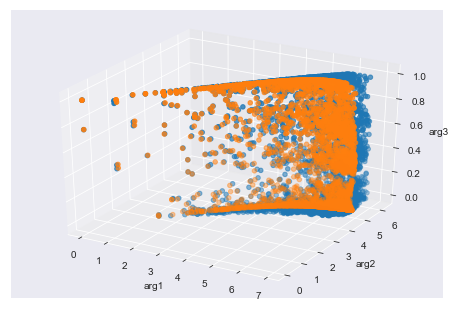

******LOG BACK TRANSFORMED METRICS
rmse is  95.98854845198822
r2 is  0.1661166466043188
mean absolute error is  56.995952178783895
mean squared log error is  0.22416138670163885
median absolute error is  28.029333797887908
MAPE is  32.00145182177711
***********  psm_TX_Austin2016.csv  TESTING*************
rmse is  0.48570336755130855
r2 is  0.6724698127888469
mean absolute error is  0.3824605304236346
median absolute error is  0.31721856690173755
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


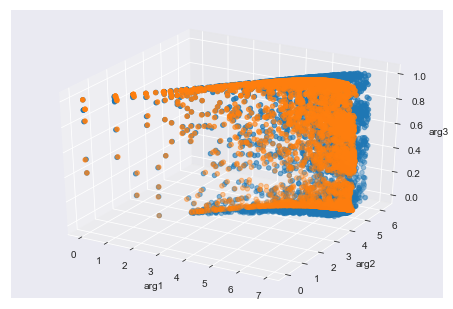

******LOG BACK TRANSFORMED METRICS
rmse is  94.47906921638176
r2 is  0.2118121864023269
mean absolute error is  57.365928788543634
mean squared log error is  0.23233331777225083
median absolute error is  32.21742728044252
MAPE is  36.48581438810752
***********  psm_TX_Austin2017.csv  TESTING*************
rmse is  0.49516047601531127
r2 is  0.629008166806321
mean absolute error is  0.3842744125821439
mean squared log error is  0.006810143183636115
median absolute error is  0.3026682119757371
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


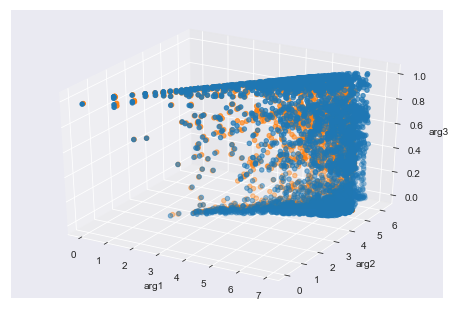

******LOG BACK TRANSFORMED METRICS
rmse is  98.85967276154543
r2 is  0.17710436061304313
mean absolute error is  59.38892063022697
mean squared log error is  0.24161708921440828
median absolute error is  30.151852087916865
MAPE is  35.69667802120783
***********  psm_TX_Austin2015.csv  TESTING*************
rmse is  0.48330601724180167
r2 is  0.6869233336244724
mean absolute error is  0.3709720339236913
median absolute error is  0.2880260387568483
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


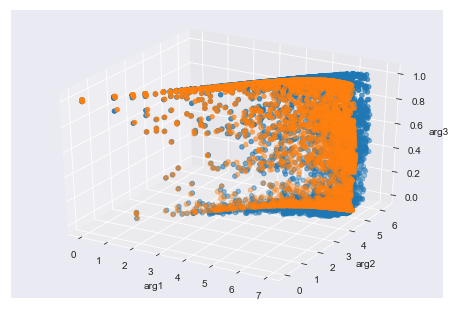

******LOG BACK TRANSFORMED METRICS
rmse is  97.40285645589499
r2 is  0.1999470231426015
mean absolute error is  58.48277661362976
mean squared log error is  0.23028930900793335
median absolute error is  29.45486436619663
MAPE is  33.55038357416112
***********  psm_TX_Austin2014.csv  TESTING*************
rmse is  0.4985321021364144
r2 is  0.6545281679982139
mean absolute error is  0.38425703906123754
median absolute error is  0.29995596808548597
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


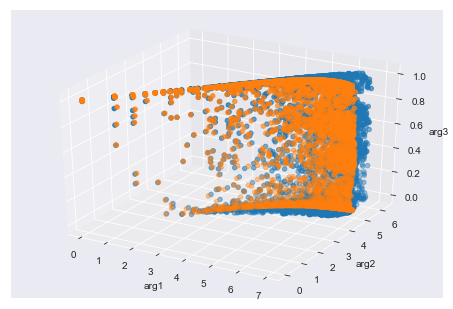

******LOG BACK TRANSFORMED METRICS
rmse is  99.27417428956801
r2 is  0.1688993783699737
mean absolute error is  60.253464797865014
mean squared log error is  0.24498970695274552
median absolute error is  30.378950283884542
MAPE is  34.95656847348821


In [70]:
#Test this model
for idx, i in enumerate(_test_files):
    path = (os.path.join(_Testing_Data_Dir, 'Austin_TX', i))
    df = pd.read_csv(path)
    df = make_df_nonzero(df)
    df = logify_df(df)
    _X = list(zip(df['GHI_log'].values, df['Cloud Cover'].values))
    X = initPolyModel(_X, degrees=5)
    Y = df['DHI_log'].values
    print("*********** ", i," TESTING*************")
    preds, resids = show_model_metrics(X, Y, clf_poly_2)
    three_dee_viz(df['GHI_log'], df['DHI_log'], df['Cloud Cover'], preds)
    preds, resids = show_model_metrics_logBackTrans(X, df['DHI'], clf_poly_2)
    

In [71]:
#Most MAPEs are 30%-40% for each location. COOL!

# Spokane_WA Testing

In [72]:
print(_Testing_Data_Dir)
_test_files = []
for i in (os.listdir(os.path.join(_Testing_Data_Dir, 'Spokane_WA'))):
    if i.startswith('psm'):
        _test_files.append(i)
print(_test_files)

/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data
['psm_WA_Spokane2017.csv', 'psm_WA_Spokane2016.csv', 'psm_WA_Spokane2014.csv', 'psm_WA_Spokane2015.csv', 'psm_WA_Spokane2011.csv', 'psm_WA_Spokane2010.csv', 'psm_WA_Spokane2012.csv', 'psm_WA_Spokane2013.csv', 'psm_WA_Spokane2018.csv']


In [73]:
#Import model
clf_poly_2 = load("Models/Log_Polynomial_clf.joblib")

print(clf_poly_2)
print(type(clf_poly_2))
print(clf_poly_2.intercept_)
print(clf_poly_2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.06544720351050781
[ 0.00000000e+00  1.06027039e+00 -1.35714898e+00 -1.43103090e-01
  1.64447112e-01  1.20982874e+01  6.62570523e-02 -2.72246070e-01
  1.62293207e+00 -3.86047516e+01 -1.28981345e-02  5.95068820e-02
  9.47386146e-02 -3.09561442e+00  4.84206590e+01  7.55433813e-04
 -4.16384739e-03 -1.28236684e-02  2.98119585e-02  1.48411244e+00
 -2.06266485e+01]


***********  psm_WA_Spokane2017.csv  TESTING*************
rmse is  0.46471042467887497
r2 is  0.7370750498994323
mean absolute error is  0.38099240077677393
median absolute error is  0.3376240419822176
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


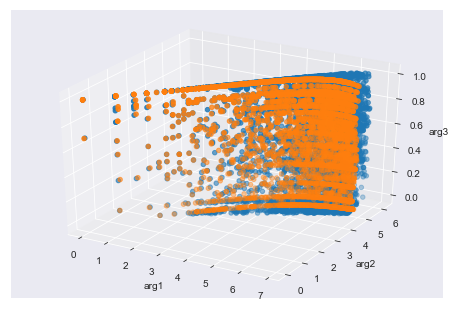

******LOG BACK TRANSFORMED METRICS
rmse is  74.22611690205908
r2 is  0.3485776170061111
mean absolute error is  48.99218990966097
mean squared log error is  0.21173226682064208
median absolute error is  32.88178687652899
MAPE is  40.554485094646125
***********  psm_WA_Spokane2016.csv  TESTING*************
rmse is  0.49044194425578636
r2 is  0.6880620936883881
mean absolute error is  0.4137085785410083
median absolute error is  0.39999686807423007
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


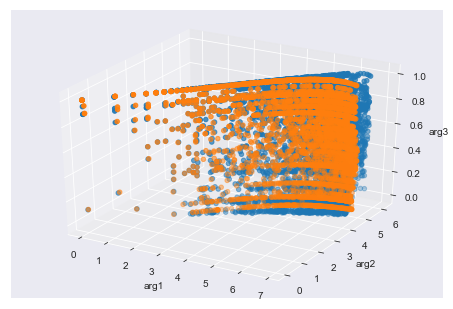

******LOG BACK TRANSFORMED METRICS
rmse is  75.73963812806578
r2 is  0.322986884673367
mean absolute error is  50.70075324027286
mean squared log error is  0.2356062192051581
median absolute error is  35.686905521808484
MAPE is  45.89442948645346
***********  psm_WA_Spokane2014.csv  TESTING*************
rmse is  0.45281624212843297
r2 is  0.7659035938860246
mean absolute error is  0.3656319600210752
median absolute error is  0.32453957862978844
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


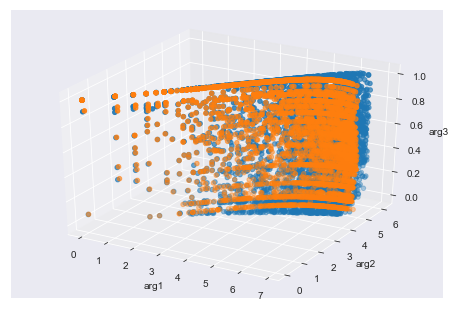

******LOG BACK TRANSFORMED METRICS
rmse is  75.19039080624576
r2 is  0.35776768381605784
mean absolute error is  48.00081831118257
mean squared log error is  0.20116999538895747
median absolute error is  30.94607370303202
MAPE is  37.70947532483238
***********  psm_WA_Spokane2015.csv  TESTING*************
rmse is  0.4430104222583092
r2 is  0.7606257624474668
mean absolute error is  0.35709054569849824
median absolute error is  0.31160507956247896
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


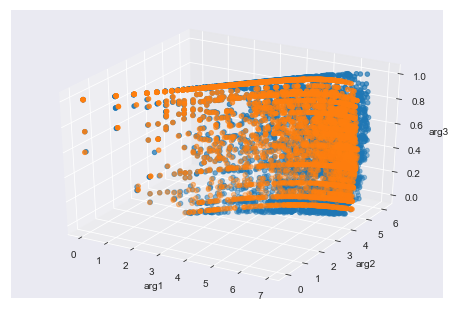

******LOG BACK TRANSFORMED METRICS
rmse is  71.04739534540265
r2 is  0.3627458100488885
mean absolute error is  45.3891776170285
mean squared log error is  0.19248000102293625
median absolute error is  29.73454122975327
MAPE is  37.19404868823493
***********  psm_WA_Spokane2011.csv  TESTING*************
rmse is  0.45173700335573796
r2 is  0.7654774595103438
mean absolute error is  0.36725400458262664
median absolute error is  0.32784885685435605
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


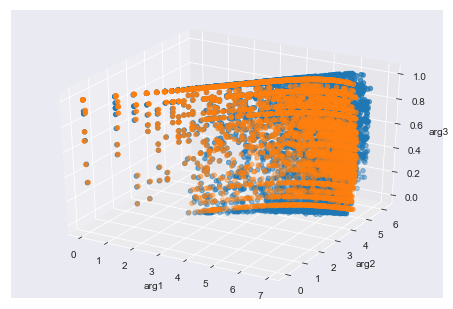

******LOG BACK TRANSFORMED METRICS
rmse is  78.06754035721566
r2 is  0.3448599192090851
mean absolute error is  49.70286235677089
mean squared log error is  0.2004114328115287
median absolute error is  31.690060427016725
MAPE is  37.05603996995856
***********  psm_WA_Spokane2010.csv  TESTING*************
rmse is  0.45122938903803594
r2 is  0.7795740634933065
mean absolute error is  0.36465550591762474
median absolute error is  0.3286365292738447
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


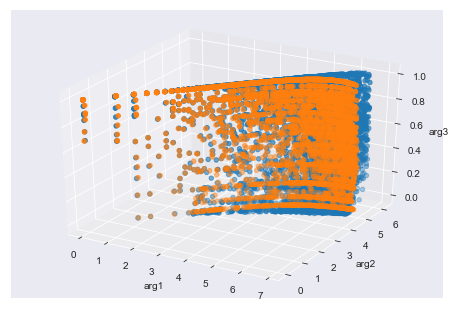

******LOG BACK TRANSFORMED METRICS
rmse is  77.19113571816389
r2 is  0.35942789690209853
mean absolute error is  48.8324299425903
mean squared log error is  0.19990382342083424
median absolute error is  32.138264850146555
MAPE is  37.01082679082809
***********  psm_WA_Spokane2012.csv  TESTING*************
rmse is  0.4360842371637333
r2 is  0.8084826176020241
mean absolute error is  0.3416354488189861
median absolute error is  0.2883952217257886
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


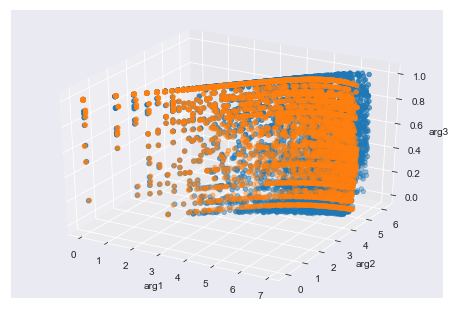

******LOG BACK TRANSFORMED METRICS
rmse is  74.53927638890087
r2 is  0.3763232432101774
mean absolute error is  45.11267795653294
mean squared log error is  0.1866794943167932
median absolute error is  26.762542586072094
MAPE is  34.69079425841212
***********  psm_WA_Spokane2013.csv  TESTING*************
rmse is  0.43988058685710646
r2 is  0.7690001060988927
mean absolute error is  0.3571384561827588
median absolute error is  0.3232437601819145
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


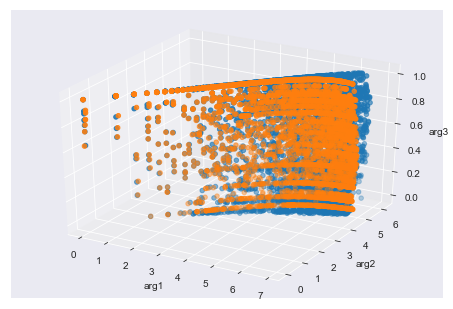

******LOG BACK TRANSFORMED METRICS
rmse is  71.33983919515019
r2 is  0.371265370998604
mean absolute error is  45.4280420107205
mean squared log error is  0.18975756320983803
median absolute error is  30.87395595535463
MAPE is  37.161143319027126
***********  psm_WA_Spokane2018.csv  TESTING*************
rmse is  0.4812270651439751
r2 is  0.7013029034956124
mean absolute error is  0.3992301001411849
mean squared log error is  0.007570275915440224
median absolute error is  0.37345891631406847
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


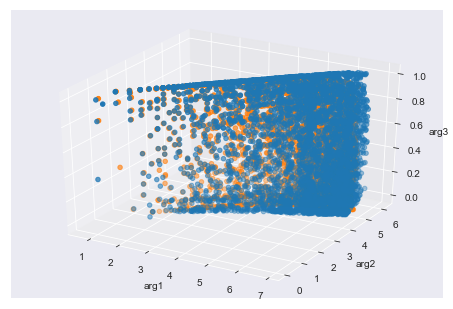

******LOG BACK TRANSFORMED METRICS
rmse is  74.29611525851861
r2 is  0.34447907964629887
mean absolute error is  49.1305444460732
mean squared log error is  0.2263181308778076
median absolute error is  35.3340234726467
MAPE is  43.03046614981377


In [74]:
#Test this model
for idx, i in enumerate(_test_files):
    path = (os.path.join(_Testing_Data_Dir, 'Spokane_WA', i))
    df = pd.read_csv(path)
    df = make_df_nonzero(df)
    df = logify_df(df)
    _X = list(zip(df['GHI_log'].values, df['Cloud Cover'].values))
    X = initPolyModel(_X, degrees=5)
    Y = df['DHI_log'].values
    print("*********** ", i," TESTING*************")
    preds, resids = show_model_metrics(X, Y, clf_poly_2)
    three_dee_viz(df['GHI_log'], df['DHI_log'], df['Cloud Cover'], preds)
    preds, resids = show_model_metrics_logBackTrans(X, df['DHI'], clf_poly_2)
    

In [75]:
#MAPE between 35%-45%

# Everglades_FL Testing

In [76]:
print(_Testing_Data_Dir)
_test_files = []
for i in (os.listdir(os.path.join(_Testing_Data_Dir, 'Everglades_FL'))):
    if i.startswith('psm'):
        _test_files.append(i)
print(_test_files)

/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data
['psm_FL_Everglades2018.csv', 'psm_FL_Everglades2016.csv', 'psm_FL_Everglades2017.csv', 'psm_FL_Everglades2015.csv', 'psm_FL_Everglades2014.csv', 'psm_FL_Everglades2010.csv', 'psm_FL_Everglades2011.csv', 'psm_FL_Everglades2013.csv', 'psm_FL_Everglades2012.csv']


In [77]:
#Import model
clf_poly_2 = load("Models/Log_Polynomial_clf.joblib")

print(clf_poly_2)
print(type(clf_poly_2))
print(clf_poly_2.intercept_)
print(clf_poly_2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>
0.06544720351050781
[ 0.00000000e+00  1.06027039e+00 -1.35714898e+00 -1.43103090e-01
  1.64447112e-01  1.20982874e+01  6.62570523e-02 -2.72246070e-01
  1.62293207e+00 -3.86047516e+01 -1.28981345e-02  5.95068820e-02
  9.47386146e-02 -3.09561442e+00  4.84206590e+01  7.55433813e-04
 -4.16384739e-03 -1.28236684e-02  2.98119585e-02  1.48411244e+00
 -2.06266485e+01]


***********  psm_FL_Everglades2018.csv  TESTING*************
rmse is  0.49843760528204306
r2 is  0.7701741032621954
mean absolute error is  0.373177297798044
median absolute error is  0.27219056862956403
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


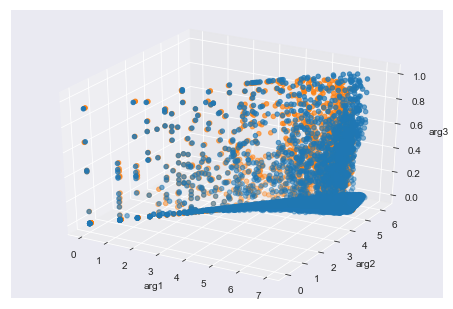

******LOG BACK TRANSFORMED METRICS
rmse is  98.85909232723843
r2 is  0.1525642938977172
mean absolute error is  60.01307819783548
mean squared log error is  0.24517769448902538
median absolute error is  26.955340849634844
MAPE is  30.420001309333163
***********  psm_FL_Everglades2016.csv  TESTING*************
rmse is  0.60332115066983
r2 is  0.5702014997126301
mean absolute error is  0.45330369098891454
mean squared log error is  0.009636325492011813
median absolute error is  0.30514408029111095
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


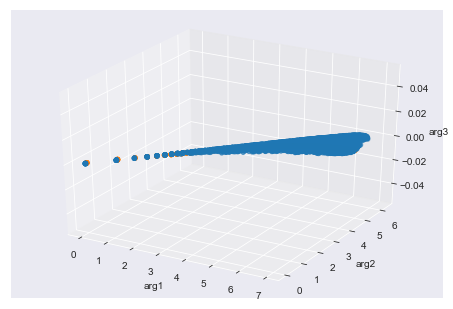

******LOG BACK TRANSFORMED METRICS
rmse is  125.84701534169149
r2 is  -0.029949110129947387
mean absolute error is  77.62184894075295
mean squared log error is  0.35950326622211703
median absolute error is  27.817014953009306
MAPE is  34.58793717442686
***********  psm_FL_Everglades2017.csv  TESTING*************
rmse is  0.6010660562395287
r2 is  0.5405446451984344
mean absolute error is  0.4544647527693549
mean squared log error is  0.009592986461437462
median absolute error is  0.3064808018283949
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


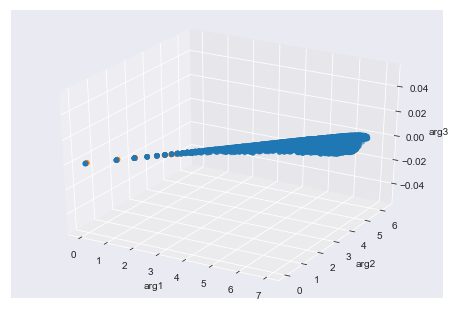

******LOG BACK TRANSFORMED METRICS
rmse is  125.76065802816491
r2 is  -0.01264430551086937
mean absolute error is  77.06616346206158
mean squared log error is  0.35675377648569356
median absolute error is  28.755448144332718
MAPE is  35.5978723137811
***********  psm_FL_Everglades2015.csv  TESTING*************
rmse is  0.6069512911851017
r2 is  0.5366672243676536
mean absolute error is  0.4617659453158638
mean squared log error is  0.009777687399698991
median absolute error is  0.3151229742335704
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


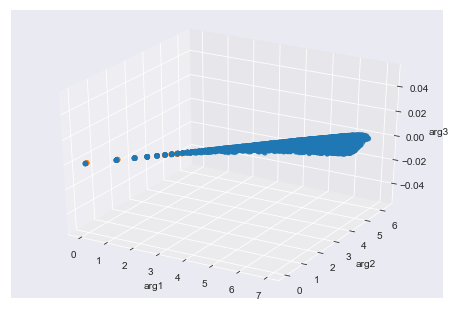

******LOG BACK TRANSFORMED METRICS
rmse is  126.00321107543776
r2 is  -0.03465647808965433
mean absolute error is  78.22162662623069
mean squared log error is  0.3638021052163301
median absolute error is  29.1503937878485
MAPE is  35.35130985457786
***********  psm_FL_Everglades2014.csv  TESTING*************
rmse is  0.5935550744941026
r2 is  0.5270255814153271
mean absolute error is  0.4520323781085678
mean squared log error is  0.009425259248829235
median absolute error is  0.32496236278648727
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


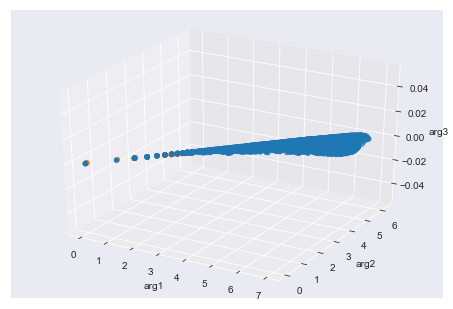

******LOG BACK TRANSFORMED METRICS
rmse is  122.49833964605942
r2 is  -0.013985273175235458
mean absolute error is  75.09410097460614
mean squared log error is  0.34779145331361166
median absolute error is  30.202384089313497
MAPE is  35.562474983540596
***********  psm_FL_Everglades2010.csv  TESTING*************
rmse is  0.555136870170311
r2 is  0.5865569528441426
mean absolute error is  0.4106849297644897
mean squared log error is  0.008309926476517087
median absolute error is  0.2723308856187163
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


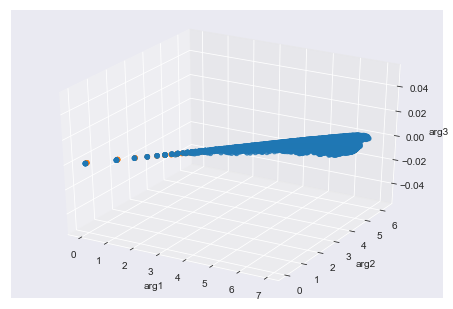

******LOG BACK TRANSFORMED METRICS
rmse is  112.8027455466586
r2 is  0.03375656406207106
mean absolute error is  66.39224933633731
mean squared log error is  0.30412350463064297
median absolute error is  24.805439683526643
MAPE is  32.85262612468477
***********  psm_FL_Everglades2011.csv  TESTING*************
rmse is  0.5610598842239555
r2 is  0.585155249507032
mean absolute error is  0.4152917435720582
mean squared log error is  0.00843481095482567
median absolute error is  0.26909347604875844
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


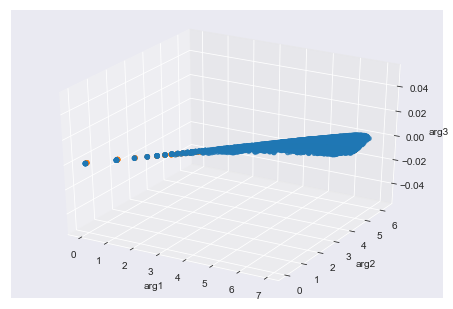

******LOG BACK TRANSFORMED METRICS
rmse is  115.1383906367907
r2 is  0.016417442404827343
mean absolute error is  68.1756437516185
mean squared log error is  0.31073908753527196
median absolute error is  25.482268794190674
MAPE is  32.68582892383782
***********  psm_FL_Everglades2013.csv  TESTING*************
rmse is  0.5995682249887142
r2 is  0.5313744907454749
mean absolute error is  0.4538267205059128
mean squared log error is  0.009563093963292253
median absolute error is  0.3088987509583747
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


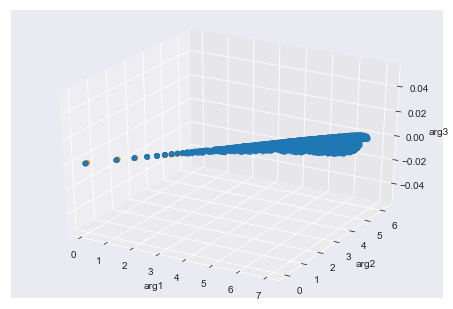

******LOG BACK TRANSFORMED METRICS
rmse is  124.17039964564705
r2 is  -0.037412124840008776
mean absolute error is  76.50694995818596
mean squared log error is  0.35497081171402806
median absolute error is  28.99219605201209
MAPE is  34.827983592850565
***********  psm_FL_Everglades2012.csv  TESTING*************
rmse is  0.5941890158264153
r2 is  0.5438754371061475
mean absolute error is  0.449713103414812
mean squared log error is  0.00940509028061617
median absolute error is  0.31503933384631555
MAPE is  inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


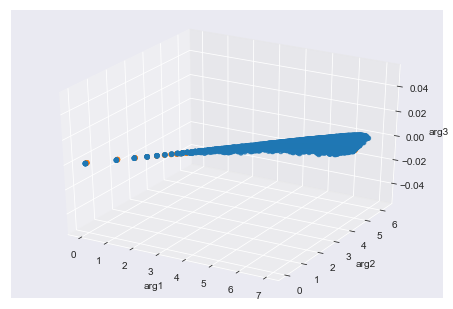

******LOG BACK TRANSFORMED METRICS
rmse is  122.6664548214584
r2 is  -0.02702796860913148
mean absolute error is  75.69990573607663
mean squared log error is  0.3486070461776148
median absolute error is  29.7667491593361
MAPE is  34.8215692385885


In [78]:
#Test this model
for idx, i in enumerate(_test_files):
    path = (os.path.join(_Testing_Data_Dir, 'Everglades_FL', i))
    df = pd.read_csv(path)
    df = make_df_nonzero(df)
    df = logify_df(df)
    _X = list(zip(df['GHI_log'].values, df['Cloud Cover'].values))
    X = initPolyModel(_X, degrees=5)
    Y = df['DHI_log'].values
    print("*********** ", i," TESTING*************")
    preds, resids = show_model_metrics(X, Y, clf_poly_2)
    three_dee_viz(df['GHI_log'], df['DHI_log'], df['Cloud Cover'], preds)
    preds, resids = show_model_metrics_logBackTrans(X, df['DHI'], clf_poly_2)

In [79]:
#30%-35% MAPE

In [80]:
for idx, i in enumerate(_test_files):
    path = (os.path.join(_Testing_Data_Dir,'psm_south_dakota', i))
    df = pd.read_csv(path)
    df = make_df_nonzero(df)
    df = logify_df(df)
    _X = list(zip(df['GHI_log'].values, df['Cloud Cover'].values))
    X = initPolyModel(_X, degrees=5)
    Y = df['DHI_log'].values
    print("*********** ", i," TESTING*************")
    preds, resids = show_model_metrics(X, Y, clf_poly_2)
    three_dee_viz(df['GHI_log'], df['DHI_log'], df['Cloud Cover'], preds)
    preds, resids = show_model_metrics_logBackTrans(X, df['DHI'], clf_poly_2)
    

FileNotFoundError: [Errno 2] File b'/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data/psm_south_dakota/psm_FL_Everglades2018.csv' does not exist: b'/Users/tuomastalvitie/Documents/GRIP/Diffuse:Direct/solarIrradiencePredictor/Testing_Data/psm_south_dakota/psm_FL_Everglades2018.csv'